In [252]:
import yfinance as yf
import pandas as pd

# Lista de tickers de las acciones a consultar
tickers = [
    "LYB", "AXP", "VZ", "AVGO", "BA", "ABBV", "CAT", "JPM", "CVX", "KO", 'SPY', "TSLA", "CMG", 'NVDA'
]

# Fecha de inicio y fin para los datos
start_date = "2019-05-12"
end_date = "2024-05-12"

# Descargar datos de precios mensuales
data = yf.download(tickers, start=start_date, end=end_date, interval="1d")

# Mostrar los primeros registros para revisar
print(data.head())

[*********************100%%**********************]  14 of 14 completed


Price       Adj Close                                                  \
Ticker           ABBV        AVGO         AXP          BA         CAT   
Date                                                                    
2019-05-13  61.261108  249.723068  108.052361  331.361053  111.397087   
2019-05-14  62.512318  257.060364  109.087212  336.930115  113.326294   
2019-05-15  62.783268  259.077667  109.693199  339.483826  113.175171   
2019-05-16  63.357067  253.051224  111.725594  347.508240  112.561714   
2019-05-17  63.325203  246.752457  111.007736  348.696716  109.138916   

Price                                                               ...  \
Ticker             CMG        CVX        JPM         KO        LYB  ...   
Date                                                                ...   
2019-05-13  687.270020  95.612144  94.400803  41.135307  59.310123  ...   
2019-05-14  703.179993  96.564796  95.151176  41.683216  59.770355  ...   
2019-05-15  705.890015  96.961723  94.78

In [253]:
prices = data['Adj Close'].resample('D').last()

In [254]:
returns = data['Adj Close'].pct_change()

In [255]:
returns.head()

Ticker,ABBV,AVGO,AXP,BA,CAT,CMG,CVX,JPM,KO,LYB,NVDA,SPY,TSLA,VZ
Date,,,,,,,,,,,,,,
2019-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-14,0.020424,0.029382,0.009577,0.016807,0.017318,0.023150,0.009964,0.007949,0.013320,0.007760,0.022657,0.009044,0.023347,-0.003524
2019-05-15,0.004334,0.007848,0.005555,0.007579,-0.001334,0.003854,0.004110,-0.003807,0.010064,0.002732,-0.015181,0.005857,-0.001550,0.004598
2019-05-16,0.009139,-0.023261,0.018528,0.023637,-0.005420,0.004307,-0.001240,0.012830,0.008134,0.013128,0.003822,0.009261,-0.015607,0.010034
2019-05-17,-0.000503,-0.024891,-0.006425,0.003420,-0.030408,0.009846,-0.002318,-0.004852,-0.007665,-0.020171,-0.022848,-0.006465,-0.075767,0.012373


In [256]:
returns = returns.dropna()

In [259]:
returns.shape

(1258, 14)

# Aplicar modelo Garch

In [257]:
import pickle
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_arch
from statsmodels.compat import lzip
import statsmodels.api as sm
import pandas as pd
import numpy as np
from arch import arch_model

<Figure size 1200x500 with 0 Axes>

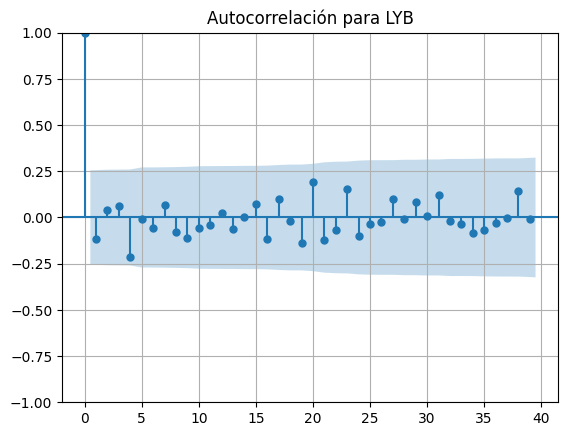

<Figure size 1200x500 with 0 Axes>

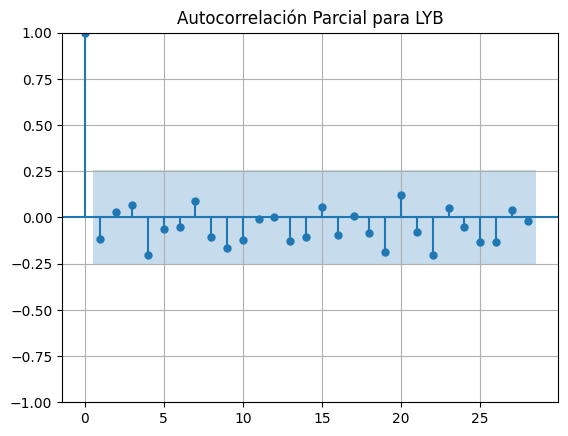

<Figure size 1200x500 with 0 Axes>

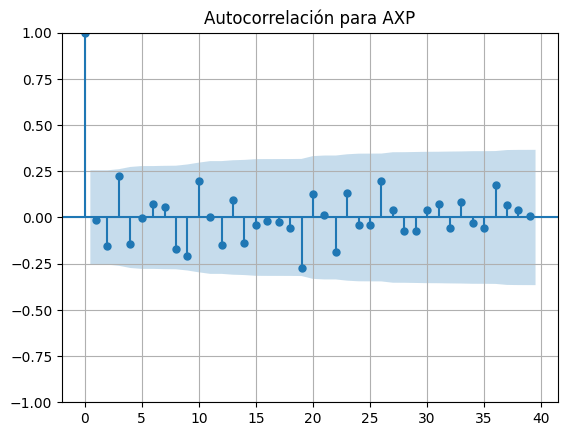

<Figure size 1200x500 with 0 Axes>

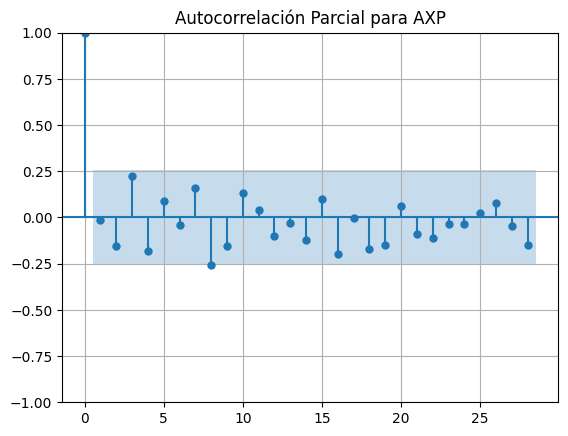

<Figure size 1200x500 with 0 Axes>

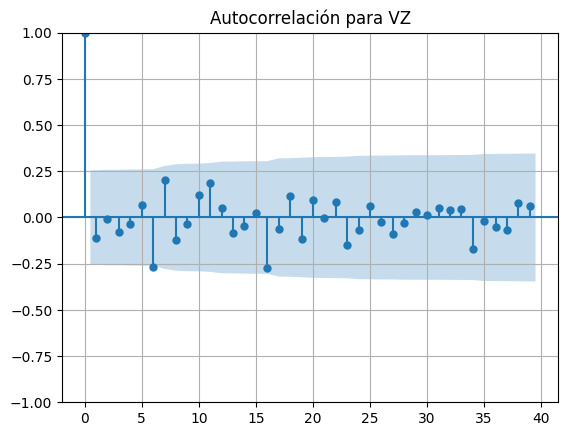

<Figure size 1200x500 with 0 Axes>

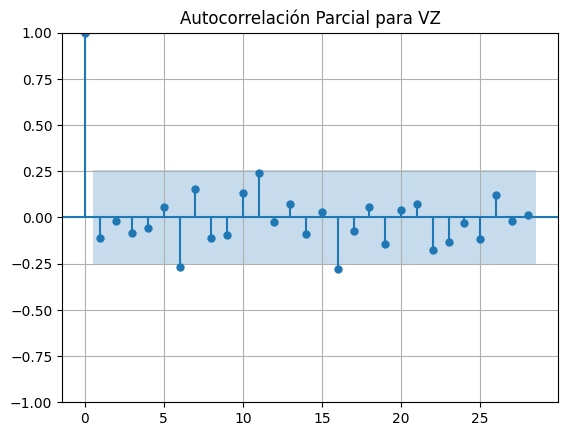

<Figure size 1200x500 with 0 Axes>

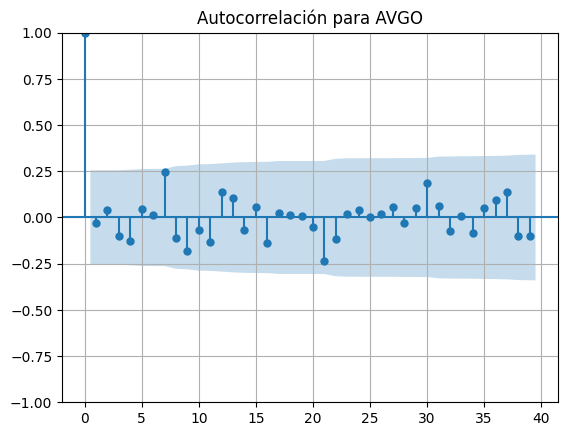

<Figure size 1200x500 with 0 Axes>

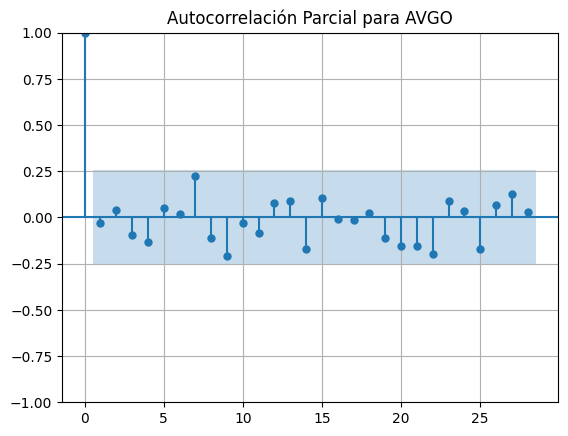

<Figure size 1200x500 with 0 Axes>

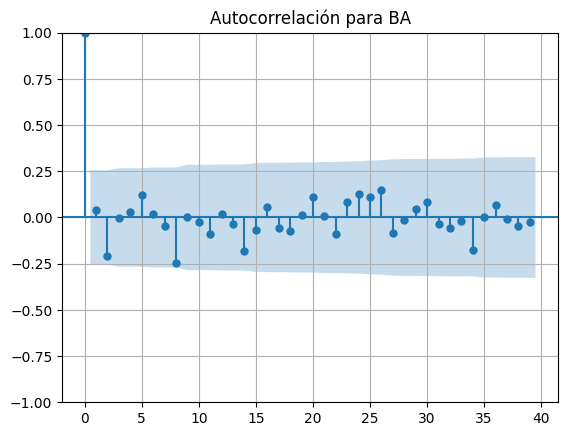

<Figure size 1200x500 with 0 Axes>

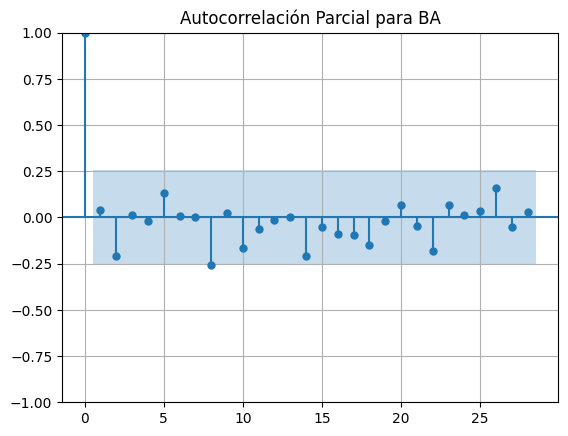

<Figure size 1200x500 with 0 Axes>

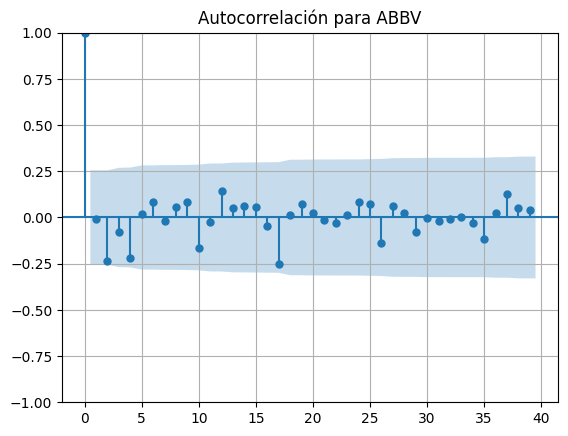

<Figure size 1200x500 with 0 Axes>

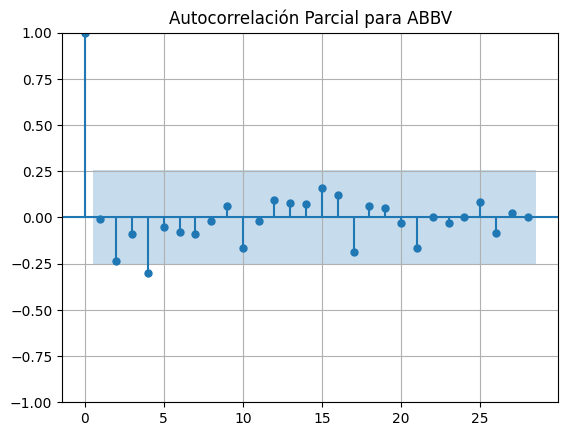

<Figure size 1200x500 with 0 Axes>

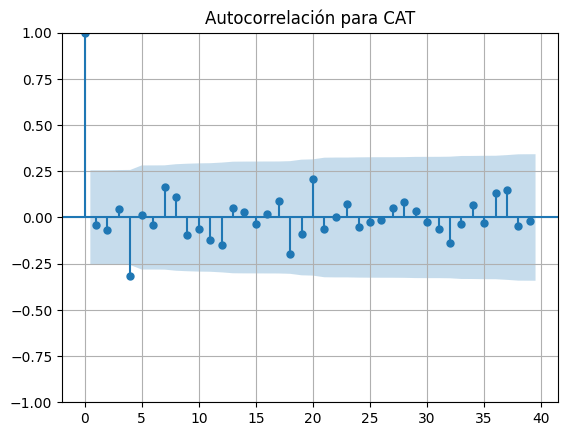

<Figure size 1200x500 with 0 Axes>

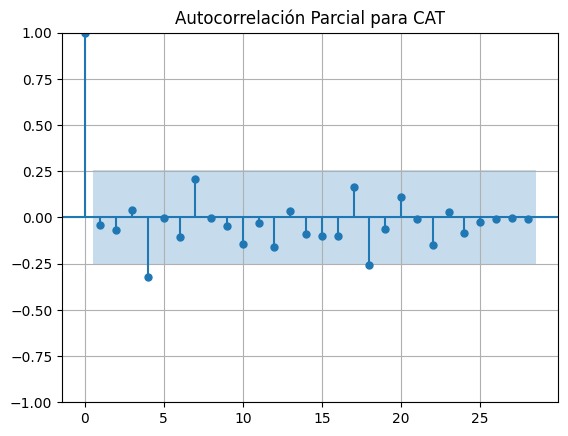

<Figure size 1200x500 with 0 Axes>

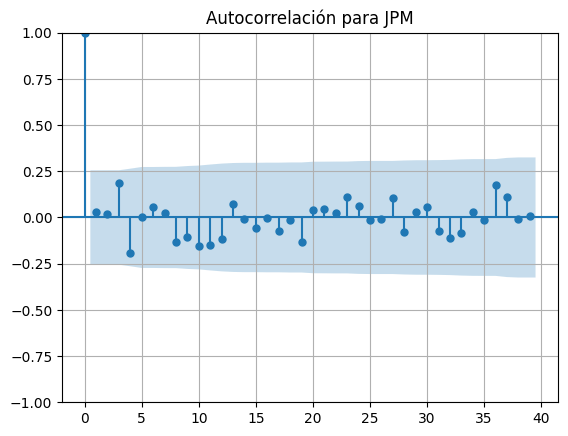

<Figure size 1200x500 with 0 Axes>

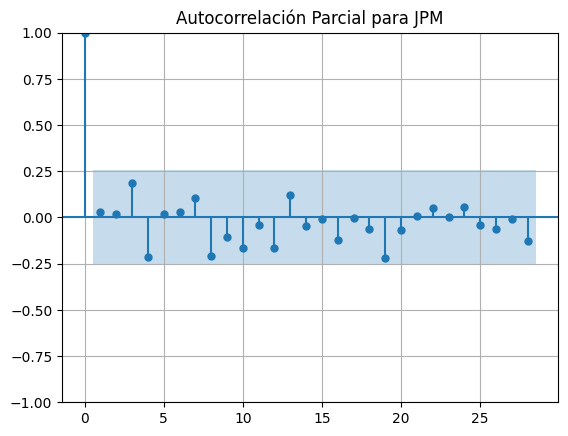

<Figure size 1200x500 with 0 Axes>

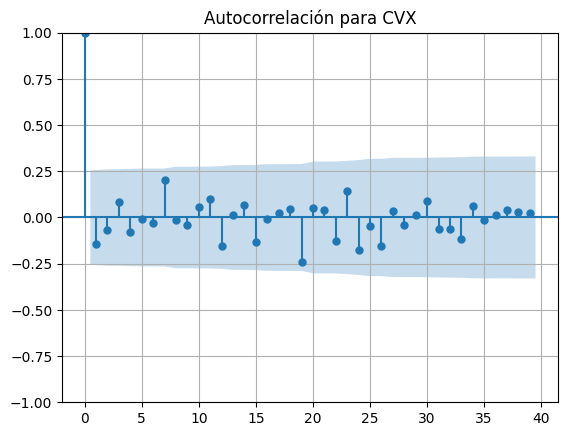

<Figure size 1200x500 with 0 Axes>

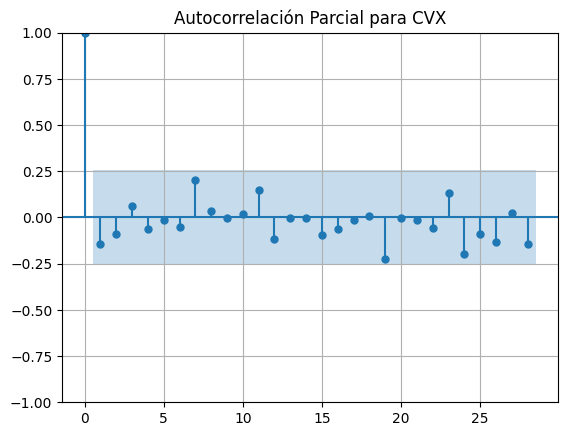

<Figure size 1200x500 with 0 Axes>

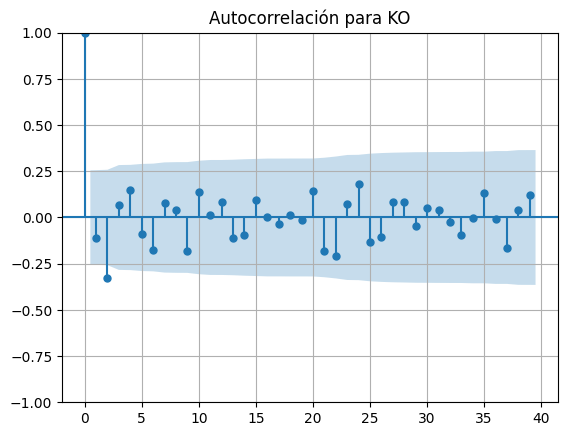

<Figure size 1200x500 with 0 Axes>

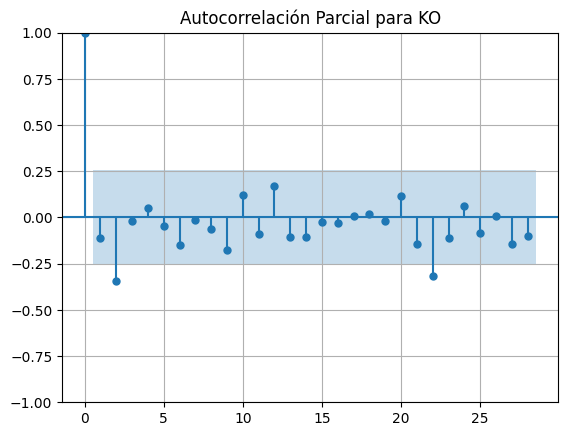

<Figure size 1200x500 with 0 Axes>

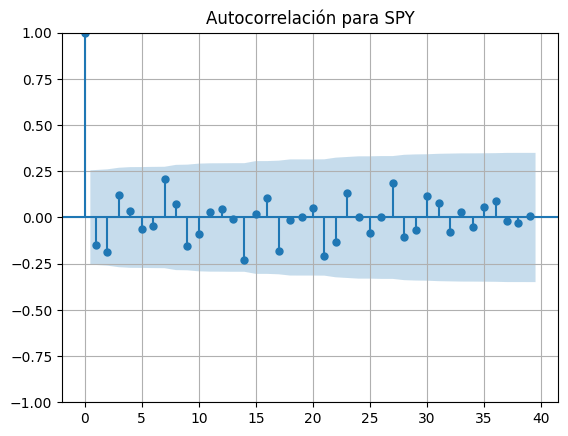

<Figure size 1200x500 with 0 Axes>

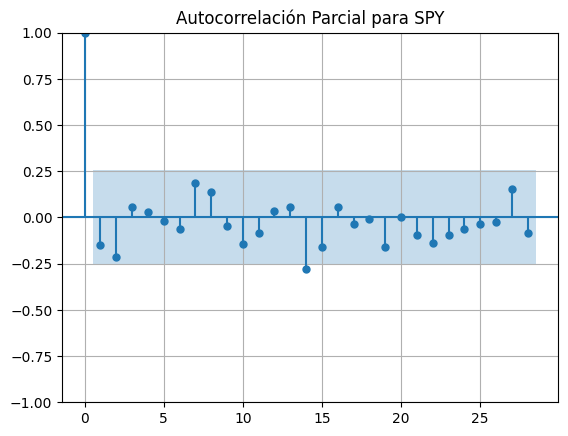

<Figure size 1200x500 with 0 Axes>

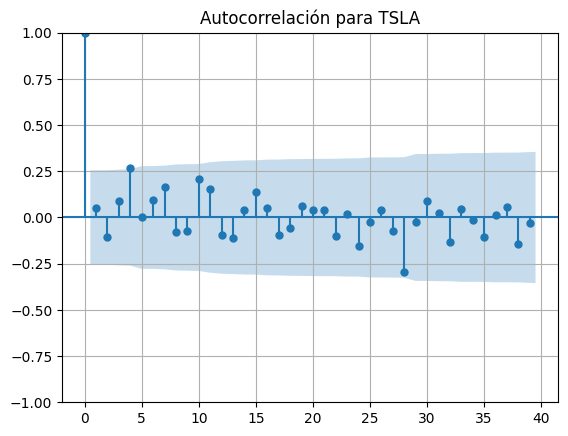

<Figure size 1200x500 with 0 Axes>

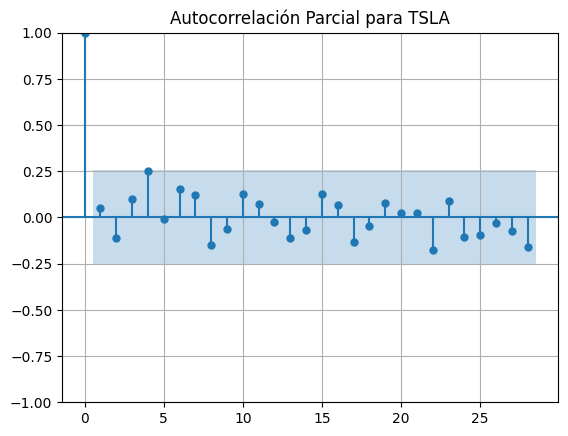

<Figure size 1200x500 with 0 Axes>

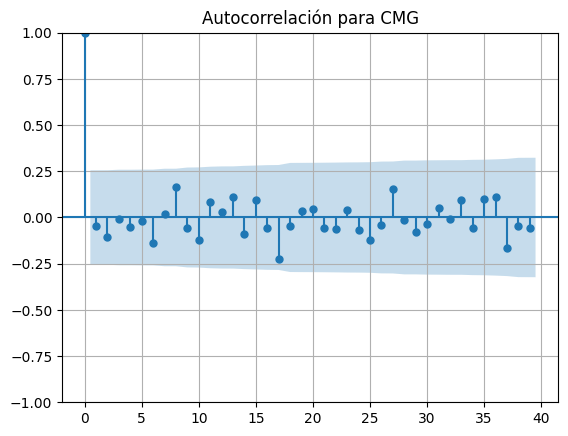

<Figure size 1200x500 with 0 Axes>

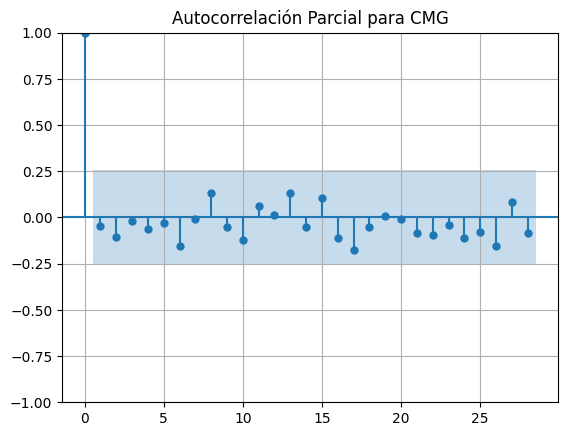

<Figure size 1200x500 with 0 Axes>

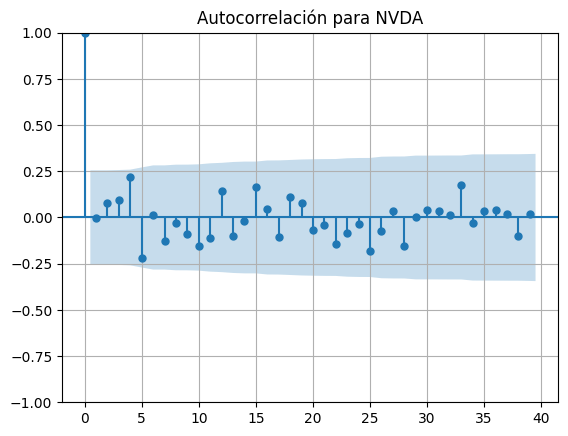

<Figure size 1200x500 with 0 Axes>

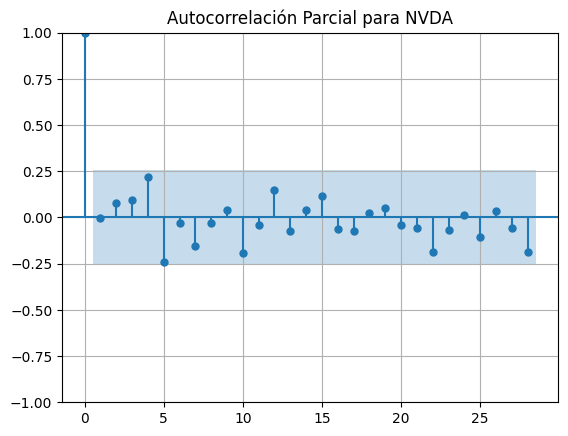

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

tickers = [
    "LYB", "AXP", "VZ", "AVGO", "BA", "ABBV", "CAT", "JPM", "CVX", "KO", 'SPY', "TSLA", "CMG", 'NVDA'
]

for ticker in tickers:
    data = returns[ticker].dropna()

  
    if len(data) < 40:
        print(f"No hay suficientes datos para realizar un análisis para {ticker}")
        continue

  
    max_lags = len(data) // 2 - 1

   
    plt.figure(figsize=(12, 5))
    plot_acf(data, lags=39, alpha=0.05)
    plt.title(f'Autocorrelación para {ticker}')
    plt.grid(True)
    plt.show()

   
    plt.figure(figsize=(12, 5))
    plot_pacf(data, lags=max_lags, alpha=0.05, method='ywm')
    plt.title(f'Autocorrelación Parcial para {ticker}')
    plt.grid(True)
    plt.show()


# Aplicación modelos Garch

In [ ]:
import pickle
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_arch
from statsmodels.compat import lzip
import statsmodels.api as sm
import pandas as pd
import numpy as np
from arch import arch_model

In [ ]:
returns.columns

Index(['ABBV', 'AVGO', 'AXP', 'BA', 'CAT', 'CMG', 'CVX', 'JPM', 'KO', 'LYB',
       'NVDA', 'SPY', 'TSLA', 'VZ'],
      dtype='object', name='Ticker')

In [260]:
returns.shape

(1258, 14)

## 1. ABBV

In [261]:
data1 = sm.add_constant(returns['ABBV'])
results_ABBV = sm.OLS(returns['ABBV'],data1['const']).fit()
print(results_ABBV.summary())

                            OLS Regression Results                            
Dep. Variable:                   ABBV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:15:53   Log-Likelihood:                 3429.2
No. Observations:                1258   AIC:                            -6856.
Df Residuals:                    1257   BIC:                            -6851.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      2.002      0.0

In [262]:
res = het_arch(results_ABBV.resid, nlags=5)
name = ['lm','lmpval','fval','fpval']    
list_ABBV = lzip(name,res)  

In [263]:
am = arch_model(returns['ABBV'], vol='GARCH')
res = am.fit()
print(res.summary())   

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6176344.204348152
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3500.070878825086
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3500.0708800226394
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   ABBV   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3500.07
Distribution:                  Normal   AIC:                          -6992.14
Method:            Maximum Likelihood   BIC:                          -6971.59
                                        No. Observations:                 1258
Date:                Thu, May 30 2024   Df Residuals:                     1257
Time:         

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002511. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 2. AVGO

In [264]:
data1 = sm.add_constant(returns['AVGO'])
results_AVGO = sm.OLS(returns['AVGO'],data1['const']).fit()
print(results_AVGO.summary())

                            OLS Regression Results                            
Dep. Variable:                   AVGO   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:16:02   Log-Likelihood:                 2932.2
No. Observations:                1258   AIC:                            -5862.
Df Residuals:                    1257   BIC:                            -5857.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.001      2.427      0.0

In [265]:
res_AVGO = het_arch(results_AVGO.resid, nlags=5)
name = ['lm','lmpval','fval','fpval']    
list_AVGO = lzip(name,res_AVGO)  

In [266]:
am = arch_model(returns['AVGO'], vol='GARCH')
res_AVGO = am.fit()
print(res_AVGO.summary())   

Iteration:      1,   Func. Count:      6,   Neg. LLF: 184055.77115928376
Iteration:      2,   Func. Count:     17,   Neg. LLF: 9802147804518440.0
Iteration:      3,   Func. Count:     28,   Neg. LLF: -3079.617164820638
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3079.617163425055
            Iterations: 7
            Function evaluations: 28
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   AVGO   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3079.62
Distribution:                  Normal   AIC:                          -6151.23
Method:            Maximum Likelihood   BIC:                          -6130.69
                                        No. Observations:                 1258
Date:               

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005533. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 3. AXP

In [267]:
data_AXP = sm.add_constant(returns['AXP'])
results_AXP = sm.OLS(returns['AXP'],data_AXP['const']).fit()
print(results_AXP.summary())

                            OLS Regression Results                            
Dep. Variable:                    AXP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:16:07   Log-Likelihood:                 2909.7
No. Observations:                1258   AIC:                            -5817.
Df Residuals:                    1257   BIC:                            -5812.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.369      0.1

In [268]:
res_AXP = het_arch(results_AXP.resid, nlags=5)
list_AXP = lzip(name,res_AXP)  

In [270]:
am = arch_model(returns['AXP'], vol='GARCH')
res_AXP = am.fit()
print(res_AXP.summary())   

Iteration:      1,   Func. Count:      6,   Neg. LLF: 509739234.17938936
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2708096438327.588
Iteration:      3,   Func. Count:     29,   Neg. LLF: -3160.5392679903243
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3160.5392662980894
            Iterations: 7
            Function evaluations: 29
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    AXP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3160.54
Distribution:                  Normal   AIC:                          -6313.08
Method:            Maximum Likelihood   BIC:                          -6292.53
                                        No. Observations:                 1258
Date:              

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005734. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 4. BA

In [271]:
data_BA = sm.add_constant(returns['BA'])
results_BA = sm.OLS(returns['BA'], data_BA['const']).fit()
print(results_BA.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:16:31   Log-Likelihood:                 2550.9
No. Observations:                1258   AIC:                            -5100.
Df Residuals:                    1257   BIC:                            -5095.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.648e-05      0.001      0.018      0.9

In [272]:
res_BA = het_arch(results_BA.resid, nlags=5)
list_BA = lzip(name,res_BA)  

In [311]:
am = arch_model(returns['BA'], vol='GARCH')
res_BA = am.fit()
print(res_BA.summary())  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1781753.8767162403
Iteration:      2,   Func. Count:     17,   Neg. LLF: -2856.5501684700193
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2856.550172528101
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                     BA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2856.55
Distribution:                  Normal   AIC:                          -5705.10
Method:            Maximum Likelihood   BIC:                          -5684.55
                                        No. Observations:                 1258
Date:                Thu, May 30 2024   Df Residuals:                     1257
Time:        

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001014. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 5. CMG

In [274]:
data_CMG = sm.add_constant(returns['CMG'])
results_CMG = sm.OLS(returns['CMG'], data_CMG['const']).fit()
print(results_CMG.summary())

                            OLS Regression Results                            
Dep. Variable:                    CMG   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:16:36   Log-Likelihood:                 3010.9
No. Observations:                1258   AIC:                            -6020.
Df Residuals:                    1257   BIC:                            -6015.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.001      2.367      0.0

In [275]:
res_CMG = het_arch(results_CMG.resid, nlags=5)
list_CMG = lzip(name,res_CMG) 

In [276]:
am = arch_model(returns['CMG'], vol='GARCH')
res_CMG = am.fit()
print(res_CMG.summary())  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 258403926.09126326
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3128.2348817728803
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3128.2348833877268
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    CMG   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3128.23
Distribution:                  Normal   AIC:                          -6248.47
Method:            Maximum Likelihood   BIC:                          -6227.92
                                        No. Observations:                 1258
Date:                Thu, May 30 2024   Df Residuals:                     1257
Time:       

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004883. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 6. CAT

In [277]:
data_CAT = sm.add_constant(returns['CAT'])
results_CAT = sm.OLS(returns['CAT'], data_CAT['const']).fit()
print(results_CAT.summary())

                            OLS Regression Results                            
Dep. Variable:                    CAT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:16:38   Log-Likelihood:                 3116.5
No. Observations:                1258   AIC:                            -6231.
Df Residuals:                    1257   BIC:                            -6226.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.969      0.0

In [278]:
res_CAT = het_arch(results_CAT.resid, nlags=5)
list_CAT = lzip(name,res_CAT)  

In [279]:
am = arch_model(returns['CAT'], vol='GARCH')
res_CAT = am.fit()
print(res_CAT.summary())  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.795750509698157e+16
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3190.7896376388126
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3190.78963828833
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    CAT   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3190.79
Distribution:                  Normal   AIC:                          -6373.58
Method:            Maximum Likelihood   BIC:                          -6353.03
                                        No. Observations:                 1258
Date:                Thu, May 30 2024   Df Residuals:                     1257
Time:      

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 7. CVX

In [280]:
data_CVX = sm.add_constant(returns['CVX'])
results_CVX = sm.OLS(returns['CVX'], data_CVX['const']).fit()
print(results_CVX.summary())

                            OLS Regression Results                            
Dep. Variable:                    CVX   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:16:40   Log-Likelihood:                 2999.6
No. Observations:                1258   AIC:                            -5997.
Df Residuals:                    1257   BIC:                            -5992.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      1.082      0.2

In [281]:
res_CVX = het_arch(results_CVX.resid, nlags=5)
list_CVX = lzip(name,res_CVX)  

In [282]:
am = arch_model(returns['CVX'], vol='GARCH')
res_CVX = am.fit()
print(res_CVX.summary())  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1821067.263852534
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3292.6011232611727
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3292.601125627788
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    CVX   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3292.60
Distribution:                  Normal   AIC:                          -6577.20
Method:            Maximum Likelihood   BIC:                          -6556.65
                                        No. Observations:                 1258
Date:                Thu, May 30 2024   Df Residuals:                     1257
Time:         

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004971. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 8.JPM

In [314]:
data_JPM = sm.add_constant(returns['JPM'])
results_JPM = sm.OLS(returns['JPM'], data_JPM['const']).fit()
print(results_JPM.summary())

                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:33:56   Log-Likelihood:                 3133.6
No. Observations:                1258   AIC:                            -6265.
Df Residuals:                    1257   BIC:                            -6260.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.402      0.1

In [315]:
res_JPM = het_arch(results_JPM.resid, nlags=5)
list_JPM = lzip(name,res_JPM)  

In [316]:
am = arch_model(returns['JPM'], vol='GARCH')
res_JPM = am.fit()
print(res_JPM.summary())  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1492310991.8810227
Iteration:      2,   Func. Count:     18,   Neg. LLF: 28355155.796515986
Iteration:      3,   Func. Count:     30,   Neg. LLF: -3421.072106781343
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3421.0721099514453
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    JPM   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3421.07
Distribution:                  Normal   AIC:                          -6834.14
Method:            Maximum Likelihood   BIC:                          -6813.60
                                        No. Observations:                 1258
Date:              

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004017. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 9. KO

In [320]:
data_KO = sm.add_constant(returns['KO'])
results_KO = sm.OLS(returns['KO'], data_KO['const']).fit()
print(results_KO.summary())

                            OLS Regression Results                            
Dep. Variable:                     KO   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        12:01:37   Log-Likelihood:                 3657.9
No. Observations:                1258   AIC:                            -7314.
Df Residuals:                    1257   BIC:                            -7309.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.154      0.2

In [321]:
res_KO = het_arch(results_KO.resid, nlags=5)
list_KO = lzip(name,res_KO)  

In [322]:
am = arch_model(returns['KO'], vol='GARCH')
res_KO = am.fit()
print(res_KO.summary())  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.007731697537319e+20
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2.2581962821174362e+23
Iteration:      3,   Func. Count:     34,   Neg. LLF: 6199249948080.455
Iteration:      4,   Func. Count:     49,   Neg. LLF: 1.4208749964186368e+25
Iteration:      5,   Func. Count:     64,   Neg. LLF: 886549608.9185312
Iteration:      6,   Func. Count:     76,   Neg. LLF: 62432029240349.27
Iteration:      7,   Func. Count:     91,   Neg. LLF: 1547529651056480.5
Iteration:      8,   Func. Count:    106,   Neg. LLF: 145643255.4451066
Iteration:      9,   Func. Count:    118,   Neg. LLF: 1.024809404076316e+25
Iteration:     10,   Func. Count:    133,   Neg. LLF: 1.2549914551293252e+19
Iteration:     11,   Func. Count:    145,   Neg. LLF: 240390572338446.94
Iteration:     12,   Func. Count:    160,   Neg. LLF: 130401.36931972526
Iteration:     13,   Func. Count:    171,   Neg. LLF: 69119718778153.37
Iteration:     14,   Func. Count:    1

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001745. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 10. LYB

In [289]:
data_LYB = sm.add_constant(returns['LYB'])
results_LYB = sm.OLS(returns['LYB'], data_LYB['const']).fit()
print(results_LYB.summary())

                            OLS Regression Results                            
Dep. Variable:                    LYB   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:16:45   Log-Likelihood:                 2830.1
No. Observations:                1258   AIC:                            -5658.
Df Residuals:                    1257   BIC:                            -5653.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.052      0.2

In [290]:
res_LYB = het_arch(results_LYB.resid, nlags=5)
list_LYB = lzip(name,res_LYB)  

In [291]:
am = arch_model(returns['LYB'], vol='GARCH')
res_LYB = am.fit()
print(res_LYB.summary())  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7356471.56826322
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3108.1418183823803
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3108.1418227651434
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    LYB   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3108.14
Distribution:                  Normal   AIC:                          -6208.28
Method:            Maximum Likelihood   BIC:                          -6187.73
                                        No. Observations:                 1258
Date:                Thu, May 30 2024   Df Residuals:                     1257
Time:         

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006509. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 11. SPY

In [292]:
data_SPY = sm.add_constant(returns['SPY'])
results_SPY = sm.OLS(returns['SPY'], data_SPY['const']).fit()
print(results_SPY.summary())

                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:16:46   Log-Likelihood:                 3660.7
No. Observations:                1258   AIC:                            -7319.
Df Residuals:                    1257   BIC:                            -7314.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.728      0.0

In [293]:
res_SPY = het_arch(results_SPY.resid, nlags=5)
list_SPY = lzip(name,res_SPY)  

In [294]:
am = arch_model(returns['SPY'], vol='GARCH')
res_SPY = am.fit()
print(res_SPY.summary())  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.785725668175094e+20
Iteration:      2,   Func. Count:     18,   Neg. LLF: -3989.2010888744308
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3989.2010854148866
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    SPY   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3989.20
Distribution:                  Normal   AIC:                          -7970.40
Method:            Maximum Likelihood   BIC:                          -7949.85
                                        No. Observations:                 1258
Date:                Thu, May 30 2024   Df Residuals:                     1257
Time:    

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001738. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 12. NVDA

In [295]:
data_NVDA = sm.add_constant(returns['NVDA'])
results_NVDA = sm.OLS(returns['NVDA'], data_NVDA['const']).fit()
print(results_NVDA.summary())

                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:16:47   Log-Likelihood:                 2512.9
No. Observations:                1258   AIC:                            -5024.
Df Residuals:                    1257   BIC:                            -5019.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.001      3.266      0.0

In [296]:
res_NVDA = het_arch(results_NVDA.resid, nlags=5)
list_NVDA = lzip(name,res_NVDA)  

In [297]:
am = arch_model(returns['NVDA'], vol='GARCH')
res_NVDA = am.fit()
print(res_NVDA.summary())  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 960889904.6795273
Iteration:      2,   Func. Count:     17,   Neg. LLF: 172088127.92579836
Iteration:      3,   Func. Count:     28,   Neg. LLF: 922.0523470598384
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2979257.2228561537
Iteration:      5,   Func. Count:     47,   Neg. LLF: 1475.2191654182664
Iteration:      6,   Func. Count:     55,   Neg. LLF: 177549.07405148874
Iteration:      7,   Func. Count:     63,   Neg. LLF: -2573.1165347376773
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2573.1165344113724
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   NVDA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001078. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 13. TSLA

In [298]:
data_TSLA = sm.add_constant(returns['TSLA'])
results_TSLA = sm.OLS(returns['TSLA'], data_TSLA['const']).fit()
print(results_TSLA.summary())

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:16:49   Log-Likelihood:                 2231.9
No. Observations:                1258   AIC:                            -4462.
Df Residuals:                    1257   BIC:                            -4457.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.001      2.383      0.0

In [299]:
res_TSLA = het_arch(results_TSLA.resid, nlags=5)
list_TSLA = lzip(name,res_TSLA)  

In [300]:
am = arch_model(returns['TSLA'], vol='GARCH')
res_TSLA = am.fit()
print(res_TSLA.summary())  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 45202768384.001755
Iteration:      2,   Func. Count:     16,   Neg. LLF: -2294.995988059034
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2294.995986761979
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   TSLA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2295.00
Distribution:                  Normal   AIC:                          -4581.99
Method:            Maximum Likelihood   BIC:                          -4561.44
                                        No. Observations:                 1258
Date:                Thu, May 30 2024   Df Residuals:                     1257
Time:         

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001685. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# 14. VZ

In [301]:
data_VZ = sm.add_constant(returns['VZ'])
results_VZ = sm.OLS(returns['VZ'], data_VZ['const']).fit()
print(results_VZ.summary())

                            OLS Regression Results                            
Dep. Variable:                     VZ   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 May 2024   Prob (F-statistic):                nan
Time:                        11:16:50   Log-Likelihood:                 3666.5
No. Observations:                1258   AIC:                            -7331.
Df Residuals:                    1257   BIC:                            -7326.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.638e-05      0.000      0.071      0.9

In [302]:
res_VZ = het_arch(results_VZ.resid, nlags=5)
list_VZ = lzip(name,res_VZ)  

In [303]:
am = arch_model(returns['VZ'], vol='GARCH')
res_VZ = am.fit()
print(res_VZ.summary())  

Iteration:      1,   Func. Count:      6,   Neg. LLF: 695115329.6221963
Iteration:      2,   Func. Count:     18,   Neg. LLF: 31243771571.089603
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3765.143698441915
            Iterations: 2
            Function evaluations: 28
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                     VZ   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3765.14
Distribution:                  Normal   AIC:                          -7522.29
Method:            Maximum Likelihood   BIC:                          -7501.74
                                        No. Observations:                 1258
Date:                Thu, May 30 2024   Df Residuals:                     1257
Time:          

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001722. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [304]:
returns.columns

Index(['ABBV', 'AVGO', 'AXP', 'BA', 'CAT', 'CMG', 'CVX', 'JPM', 'KO', 'LYB',
       'NVDA', 'SPY', 'TSLA', 'VZ'],
      dtype='object', name='Ticker')

In [305]:
combined_list = list_ABBV + list_AVGO + list_AXP + list_BA + list_CMG + list_CAT + list_CVX + list_JPM + list_KO + list_LYB + list_NVDA + list_SPY + list_TSLA + list_VZ

In [306]:
df = pd.DataFrame(combined_list, columns=['Ticker', 'Information'])

In [307]:
data = {
    'ABBV': list_ABBV,
    'AVGO': list_AVGO,
    'AXP': list_AXP,
    'BA': list_BA,
    'CMG': list_CMG,
    'CAT': list_CAT,
    'CVX': list_CVX,
    'JPM': list_JPM,
    'KO': list_KO,
    'LYB': list_LYB,
    'NVDA': list_NVDA,
    'SPY': list_SPY,
    'TSLA': list_TSLA,
    'VZ': list_VZ
}

df = pd.DataFrame(data, index=['Im', 'lmpval', 'fval', 'fpval']).transpose()

df

,Im,lmpval,fval,fpval
ABBV,"(lm, 45.06623112474861)","(lmpval, 1.40658271424978e-08)","(fval, 9.304746942357443)","(fpval, 1.0299480489699354e-08)"
AVGO,"(lm, 346.33432492971036)","(lmpval, 1.0771482200729733e-72)","(fval, 95.26750930630902)","(fpval, 4.2735441147572694e-85)"
AXP,"(lm, 156.518575561141)","(lmpval, 5.462456920380818e-32)","(fval, 35.60090656795731)","(fpval, 3.894365435816165e-34)"
BA,"(lm, 349.5204981042867)","(lmpval, 2.2199246411566414e-73)","(fval, 96.48299938659922)","(fpval, 4.824682324950286e-86)"
CMG,"(lm, 139.59693325179438)","(lmpval, 2.179430466233536e-28)","(fval, 31.269426313580446)","(fpval, 4.612008909765351e-30)"
CAT,"(lm, 140.4720182593786)","(lmpval, 1.4201490290816589e-28)","(fval, 31.490193441315984)","(fpval, 2.8509946877168985e-30)"
CVX,"(lm, 339.2385350858512)","(lmpval, 3.628269811747722e-71)","(fval, 92.59100312176145)","(fpval, 5.349871924845525e-83)"
JPM,"(lm, 333.5915335590798)","(lmpval, 5.957443827797556e-70)","(fval, 90.49049634239003)","(fpval, 2.430787435785697e-81)"
KO,"(lm, 409.5366251635995)","(lmpval, 2.6102803964433374e-86)","(fval, 121.09409532525663)","(fpval, 1.4906765504023546e-104)"
LYB,"(lm, 345.7301053697136)","(lmpval, 1.4532794327355328e-72)","(fval, 95.03796917492058)","(fpval, 6.457314478216187e-85)"


In [308]:
for column in df.columns:
    df[column] = df[column].apply(lambda x: x[1])

df

,Im,lmpval,fval,fpval
ABBV,45.066231,1.406583e-08,9.304747,1.029948e-08
AVGO,346.334325,1.077148e-72,95.267509,4.273544e-85
AXP,156.518576,5.462457e-32,35.600907,3.894365e-34
BA,349.520498,2.219925e-73,96.482999,4.824682e-86
CMG,139.596933,2.179430e-28,31.269426,4.612009e-30
CAT,140.472018,1.420149e-28,31.490193,2.850995e-30
CVX,339.238535,3.628270e-71,92.591003,5.349872e-83
JPM,333.591534,5.957444e-70,90.490496,2.430787e-81
KO,409.536625,2.610280e-86,121.094095,1.490677e-104
LYB,345.730105,1.453279e-72,95.037969,6.457314e-85


In [309]:
import seaborn as sns
import matplotlib.pyplot as plt


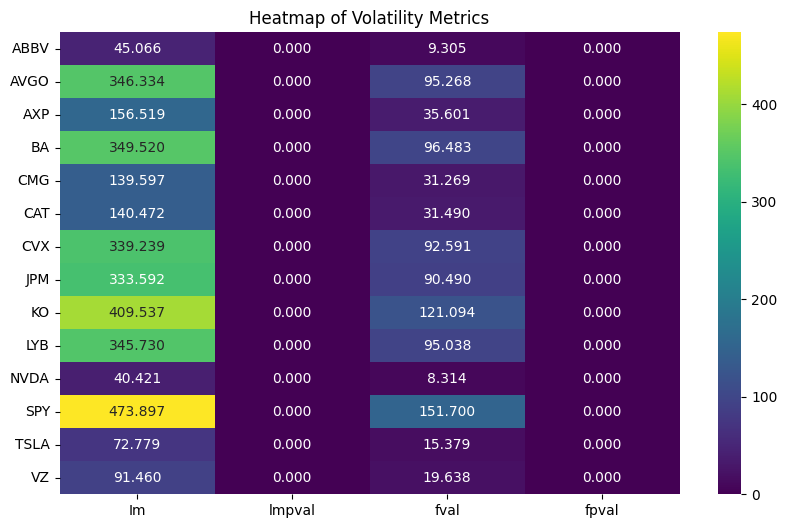

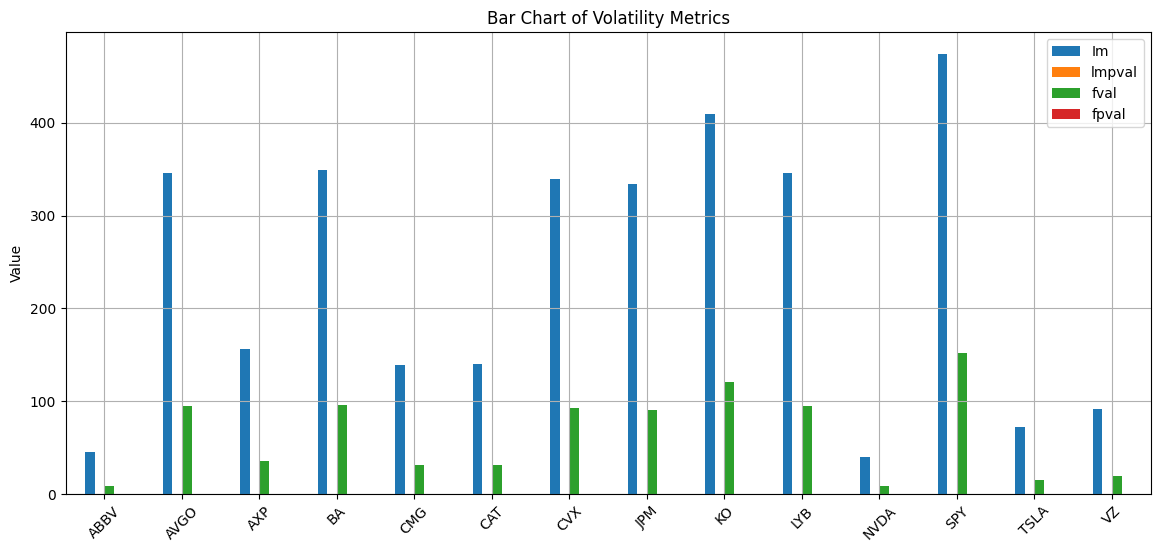

In [310]:
# Mapa de Calor
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='viridis', fmt=".3f")
plt.title('Heatmap of Volatility Metrics')
plt.show()

# Gráfico de Barras
df.plot(kind='bar', figsize=(14, 6))
plt.title('Bar Chart of Volatility Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()